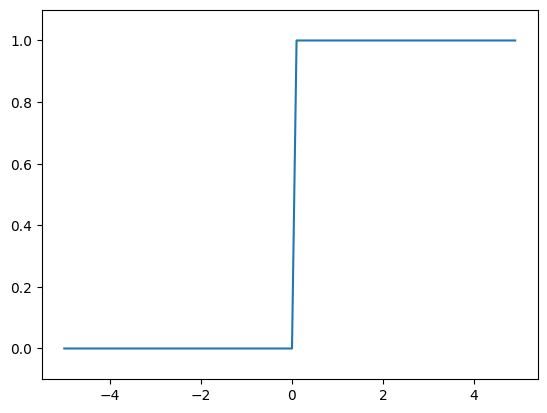

In [5]:
import numpy as np
import matplotlib.pylab as plt

x = np.array([-1.0, 1.0, 2.0])
y = x > 0
y
y.astype(np.int32)

def step_function(x):
    return np.array(x > 0, dtype=np.int32)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

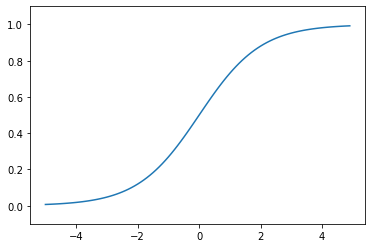

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [9]:
def relu(x):
    return np.maximum(0, x)

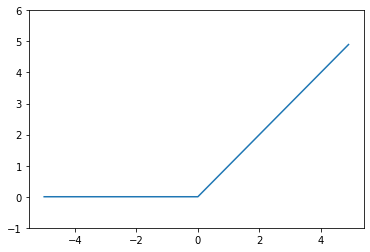

In [12]:
x = np.arange(-5, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 6)
plt.show()

In [7]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp( a - c )
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

np.sum(y)

[0.01821127 0.24519181 0.73659691]


np.float64(1.0)

In [6]:
import sys, os
import pickle
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)



5
(784,)
(28, 28)


In [8]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [18]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
        
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


In [17]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network["W1"], network["W2"], network["W3"]

x.shape
x[0].shape
W1.shape
W2.shape
W3.shape

(100, 10)